Classes in JSON: 100
Folders found: 10
Intersection: 10 classes actually present in train.X1


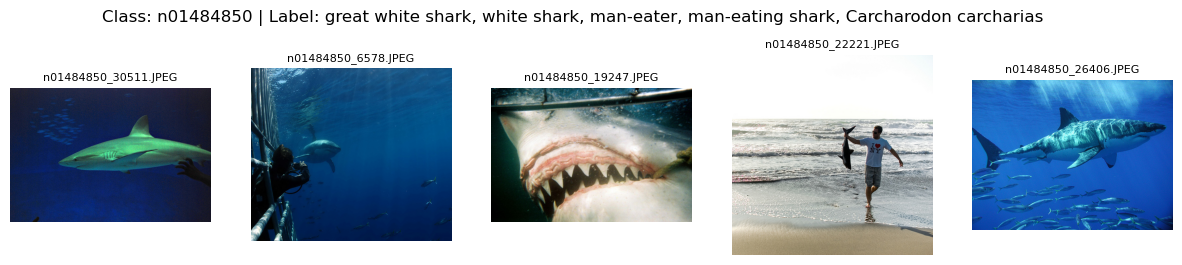

In [9]:
import os
import json
import random
from PIL import Image
import matplotlib.pyplot as plt

IMAGENET_ROOT = "../../datasets/imagenet"
TRAIN_DIR = os.path.join(IMAGENET_ROOT, "train.X1")
LABELS_JSON = os.path.join(IMAGENET_ROOT, "Labels.json")

with open(LABELS_JSON, "r") as f:
    label_map = json.load(f)

all_classes_in_json = sorted(label_map.keys())

# 1) Gather only classes that actually have a folder in TRAIN_DIR
actual_folders = {
    d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))
}
existing_classes = [c for c in all_classes_in_json if c in actual_folders]

print(f"Classes in JSON: {len(all_classes_in_json)}")
print(f"Folders found: {len(actual_folders)}")
print(f"Intersection: {len(existing_classes)} classes actually present in train.X1")

def show_random_images_from_class(class_id, root=TRAIN_DIR, num_images=5):
    class_folder = os.path.join(root, class_id)
    if not os.path.isdir(class_folder):
        print(f"Folder does not exist for class_id: {class_id}")
        return

    # Gather JPEG files
    all_files = [f for f in os.listdir(class_folder) if f.lower().endswith(".jpeg")]
    if len(all_files) == 0:
        print(f"No images found in {class_folder}")
        return

    sample_files = random.sample(all_files, min(num_images, len(all_files)))
    fig, axes = plt.subplots(1, len(sample_files), figsize=(3*len(sample_files), 3))
    if len(sample_files) == 1:
        axes = [axes]  # Make it iterable if only one image

    label_text = label_map.get(class_id, "Unknown Label")

    for ax, fname in zip(axes, sample_files):
        img_path = os.path.join(class_folder, fname)
        img = Image.open(img_path).convert("RGB")
        ax.imshow(img)
        ax.set_title(fname, fontsize=8)
        ax.axis("off")

    plt.suptitle(f"Class: {class_id} | Label: {label_text}")
    plt.show()

# Pick one of the existing classes randomly or specify one
chosen_class = random.choice(existing_classes)
show_random_images_from_class(chosen_class)